# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
# dataset = pd.read_csv('Mall_Customers.csv')
# X = dataset.iloc[:, [3, 4]].values
# Importing the dataset

dataset = pd.read_csv('covid19_cfr.csv')
X = dataset.iloc[:, [1,3,4,5,6,7,8,9,10,11]].values

dataset

,provinsi,kepadatan2019,jumlahpenduduk2020,rerataaktif03sd11,rerataterkonfirmasi03sd11,reratasembuh03sd11,reratameninggal03sd11,rasioaktif,rasioterkonfrimasi,rasiosembuh,rasiomeninggal,reratacrf,reratari
0,Aceh,93,5388100,17266.7778,45499.5556,26577.4444,1655.6667,34.6722,13.1579,22.5258,361.5932,4.847467,45.827761
1,Bali,750,4414400,13687.0000,101577.7778,85267.1111,2621.3333,35.8361,4.8287,5.7524,187.1143,6.370263,64.097317
2,Banten,1338,12895300,20126.0000,72602.1111,49701.7778,2705.0000,71.1920,19.7351,28.8282,529.6899,5.375474,47.071811
3,Bengkulu,100,1994300,2231.6667,8126.1111,5434.7778,461.2222,99.2930,27.2687,40.7724,480.4384,8.528196,43.503985
4,Daerah Istimewa Yogyakarta,1227,3919200,6534.4444,29471.5556,22154.3333,794.1111,66.6417,14.7758,19.6560,548.3699,3.785010,58.749598
5,DKI Jakarta,15900,10576400,169524.7778,853818.7778,659641.8889,24415.5556,6.9321,1.3764,1.7815,48.1314,4.728193,50.879391
6,Gorontalo,107,1186300,3613.1111,29404.0000,24930.8889,841.5556,36.4813,4.4828,5.2871,156.6279,3.099678,55.636714
7,Jambi,72,3604200,3868.4444,7897.5556,3887.3333,137.4444,103.5214,50.7077,103.0184,2913.6621,0.980524,37.064539
8,Jawa Barat,1394,49565200,96827.1111,266567.4444,163016.5556,6543.2222,56.8771,20.6599,33.7833,841.6716,4.530640,40.529331
9,Jawa Tengah,1058,34738200,67909.6667,274966.3333,190955.2222,16019.3333,56.8373,14.0374,20.2131,240.9464,7.235474,43.499414


## Using the elbow method to find the optimal number of clusters

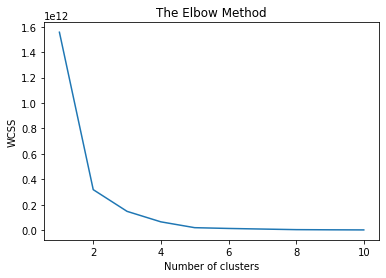

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

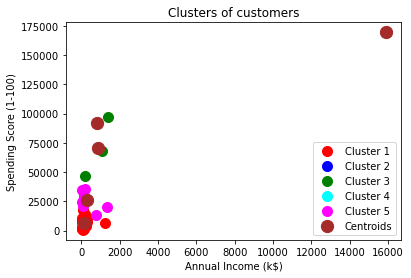

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
# Evaluation
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

# 2 Centroid : 0.3284382631419031
# 5 Centroid : 0.29233440963138657

Score davies bouldin 
0.29233440963138657


In [20]:
#Cluster result

dfLabels=pd.DataFrame(y_kmeans, columns=["hasil"])+1
Cluster = 'Cluster ' + pd.DataFrame(dfLabels['hasil'].map(str) + ' - ' + dataset['provinsi'].map(str), columns=["result"]).sort_values(by=["result"])

In [21]:
Cluster

,result
0,Cluster 1 - Aceh
3,Cluster 1 - Bengkulu
4,Cluster 1 - Daerah Istimewa Yogyakarta
6,Cluster 1 - Gorontalo
7,Cluster 1 - Jambi
11,Cluster 1 - Kalimantan Barat
13,Cluster 1 - Kalimantan Tengah
15,Cluster 1 - Kalimantan Utara
16,Cluster 1 - Kepulauan Bangka Belitung
17,Cluster 1 - Kepulauan Riau
